In [ ]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

from wordcloud import ImageColorGenerator

import warnings
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**1. Scrape Twitter Data for Union Budget 2023**

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import os

# Using OS library to call CLI commands in Python
os.system("snscrape --jsonl --max-results 5000 --since 2023-01-31 twitter-search 'Budget 2023 until:2023-02-03' > text-query-tweets.json")

256

In [ ]:
import pandas as pd

# Reads the json generated from the CLI commands above and creates a pandas dataframe
tweets_df = pd.read_json('text-query-tweets.json', lines=True)

In [ ]:
tweets_df.head()

""


In [ ]:
tweets_df.to_csv()

'""\n'

In [ ]:
tweets_df.head()

""


**2. Data Loading**

In [ ]:
df1 = tweets_df[['date', 'rawContent','renderedContent','user','replyCount','retweetCount','likeCount','lang','place','hashtags','viewCount']].copy()

KeyError: ignored

In [ ]:
df1=tweets_df.copy()

In [ ]:
df1.head()

""


In [ ]:
print(df1.shape)

(5000, 11)


**3. Twitter Data Cleaning , Preprocessing and Exploratory Data Analysis**

In [ ]:
df1=df1.drop_duplicates('renderedContent')

In [ ]:
print(df1.shape)

(4870, 11)


In [ ]:
df1.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
0,2023-02-02 23:59:47+00:00,Senate Threatens MDAs With Zero Budget Allocat...,Senate Threatens MDAs With Zero Budget Allocat...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[boldthemes],1.0
1,2023-02-02 23:59:39+00:00,A raft of concessions amid consolidation: On #...,A raft of concessions amid consolidation: On #...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,2,en,None,[India],1217.0
2,2023-02-02 23:59:37+00:00,"Common man, middle class citizens all are happ...","Common man, middle class citizens all are happ...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,"{'_type': 'snscrape.modules.twitter.Place', 'i...",None,4.0
3,2023-02-02 23:58:24+00:00,"Our 2023 budget is in the books.\n\nParks, pla...","Our 2023 budget is in the books.\n\nParks, pla...","{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,9,en,None,None,1215.0
4,2023-02-02 23:56:48+00:00,#Budget2023,#Budget2023,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,qht,None,[Budget2023],28.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   date             4870 non-null   datetime64[ns, UTC]
 1   rawContent       4870 non-null   object             
 2   renderedContent  4870 non-null   object             
 3   user             4870 non-null   object             
 4   replyCount       4870 non-null   int64              
 5   retweetCount     4870 non-null   int64              
 6   likeCount        4870 non-null   int64              
 7   lang             4870 non-null   object             
 8   place            132 non-null    object             
 9   hashtags         3718 non-null   object             
 10  viewCount        4762 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 456.6+ KB


In [ ]:
df1.date.value_counts()

2023-02-02 13:30:00+00:00    10
2023-02-02 14:30:00+00:00     9
2023-02-02 15:00:00+00:00     6
2023-02-02 13:00:01+00:00     5
2023-02-02 20:26:13+00:00     5
                             ..
2023-02-02 16:52:36+00:00     1
2023-02-02 16:52:30+00:00     1
2023-02-02 16:52:08+00:00     1
2023-02-02 16:52:02+00:00     1
2023-02-02 12:59:30+00:00     1
Name: date, Length: 4373, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

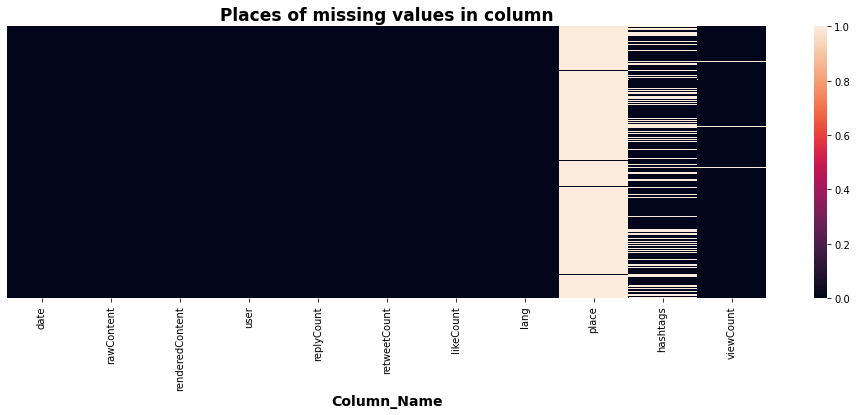

In [ ]:
#Heat Map for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [ ]:
import plotly.graph_objects as go
Top_Location_Of_tweet= df1['place'].value_counts().head(10)

In [ ]:
print (Top_Location_Of_tweet)

{'_type': 'snscrape.modules.twitter.Place', 'id': '317fcc4b21a604d5', 'fullName': 'New Delhi, India', 'name': 'New Delhi', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}                              11
{'_type': 'snscrape.modules.twitter.Place', 'id': '38ac902a28ee86da', 'fullName': 'Chennai, India', 'name': 'Chennai', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}                                   6
{'_type': 'snscrape.modules.twitter.Place', 'id': '35780b08c563d8ab', 'fullName': 'Thane, India', 'name': 'Thane', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}                                       5
{'_type': 'snscrape.modules.twitter.Place', 'id': '2e6064382c71b343', 'fullName': 'Noida, India', 'name': 'Noida', 'type': 'city', 'country': 'India', 'countryCode': 'IN'}                                       4
{'_type': 'snscrape.modules.twitter.Place', 'id': '7929cea6bd5b32bd', 'fullName': 'Mumbai, India', 'name': 'Mumbai', 'type': 'city', 'country': 'India',

In [ ]:
import nltk

In [ ]:
stop=nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Twitter Data Cleaning and Preprocessing**

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['renderedContent'].apply(lambda x: [item for item in x if item not in stop])
df1.shape

(4870, 11)

In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Remove unnecessary characters
punct =['%','/',':','\\','&amp;','&',';', '?']

def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df1['renderedContent'] = df1['renderedContent'].apply(lambda x: remove_punctuations(x))

In [ ]:
#Drop tweets which have empty text field
df1['renderedContent'].replace(' ', np.nan, inplace=True)
df1.dropna(subset=['renderedContent'], inplace=True)
len(df1)

4870

In [ ]:
df1 = df1.reset_index(drop=True)
df1.sample(5)

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount
3581,2023-02-02 14:25:33+00:00,Modi: बहनो भाईयो \nविकास हुआ की नहीं \nऐसे नही...,Modi बहनो भाईयो \nविकास हुआ की नहीं \nऐसे नहीं...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,hi,None,"[AmritKaalBudget, AmritKaal, Modi, PMModi, Nar...",6.0
1312,2023-02-02 17:24:33+00:00,India's budget focuses on fiscal consolidation...,India's budget focuses on fiscal consolidation...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,"[IncredibleIndia, Budget2023, ProsperityForAll]",18.0
1466,2023-02-02 17:04:15+00:00,भारत की जनसंख्या - 140 cr\nइनकम टैक्स पेयर्स -...,भारत की जनसंख्या - 140 cr\nइनकम टैक्स पेयर्स -...,"{'_type': 'snscrape.modules.twitter.User', 'us...",5,192,246,hi,None,[Budget2023],2253.0
924,2023-02-02 18:18:29+00:00,@MattAdams33 @AirlineFlyer Having a record hig...,@MattAdams33 @AirlineFlyer Having a record hig...,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,1,en,None,None,37.0
418,2023-02-02 20:02:54+00:00,The “Saptarishi” or the 7 priorities aim to ac...,The “Saptarishi” or the 7 priorities aim to ac...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,en,None,[budget2023],56.0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backe

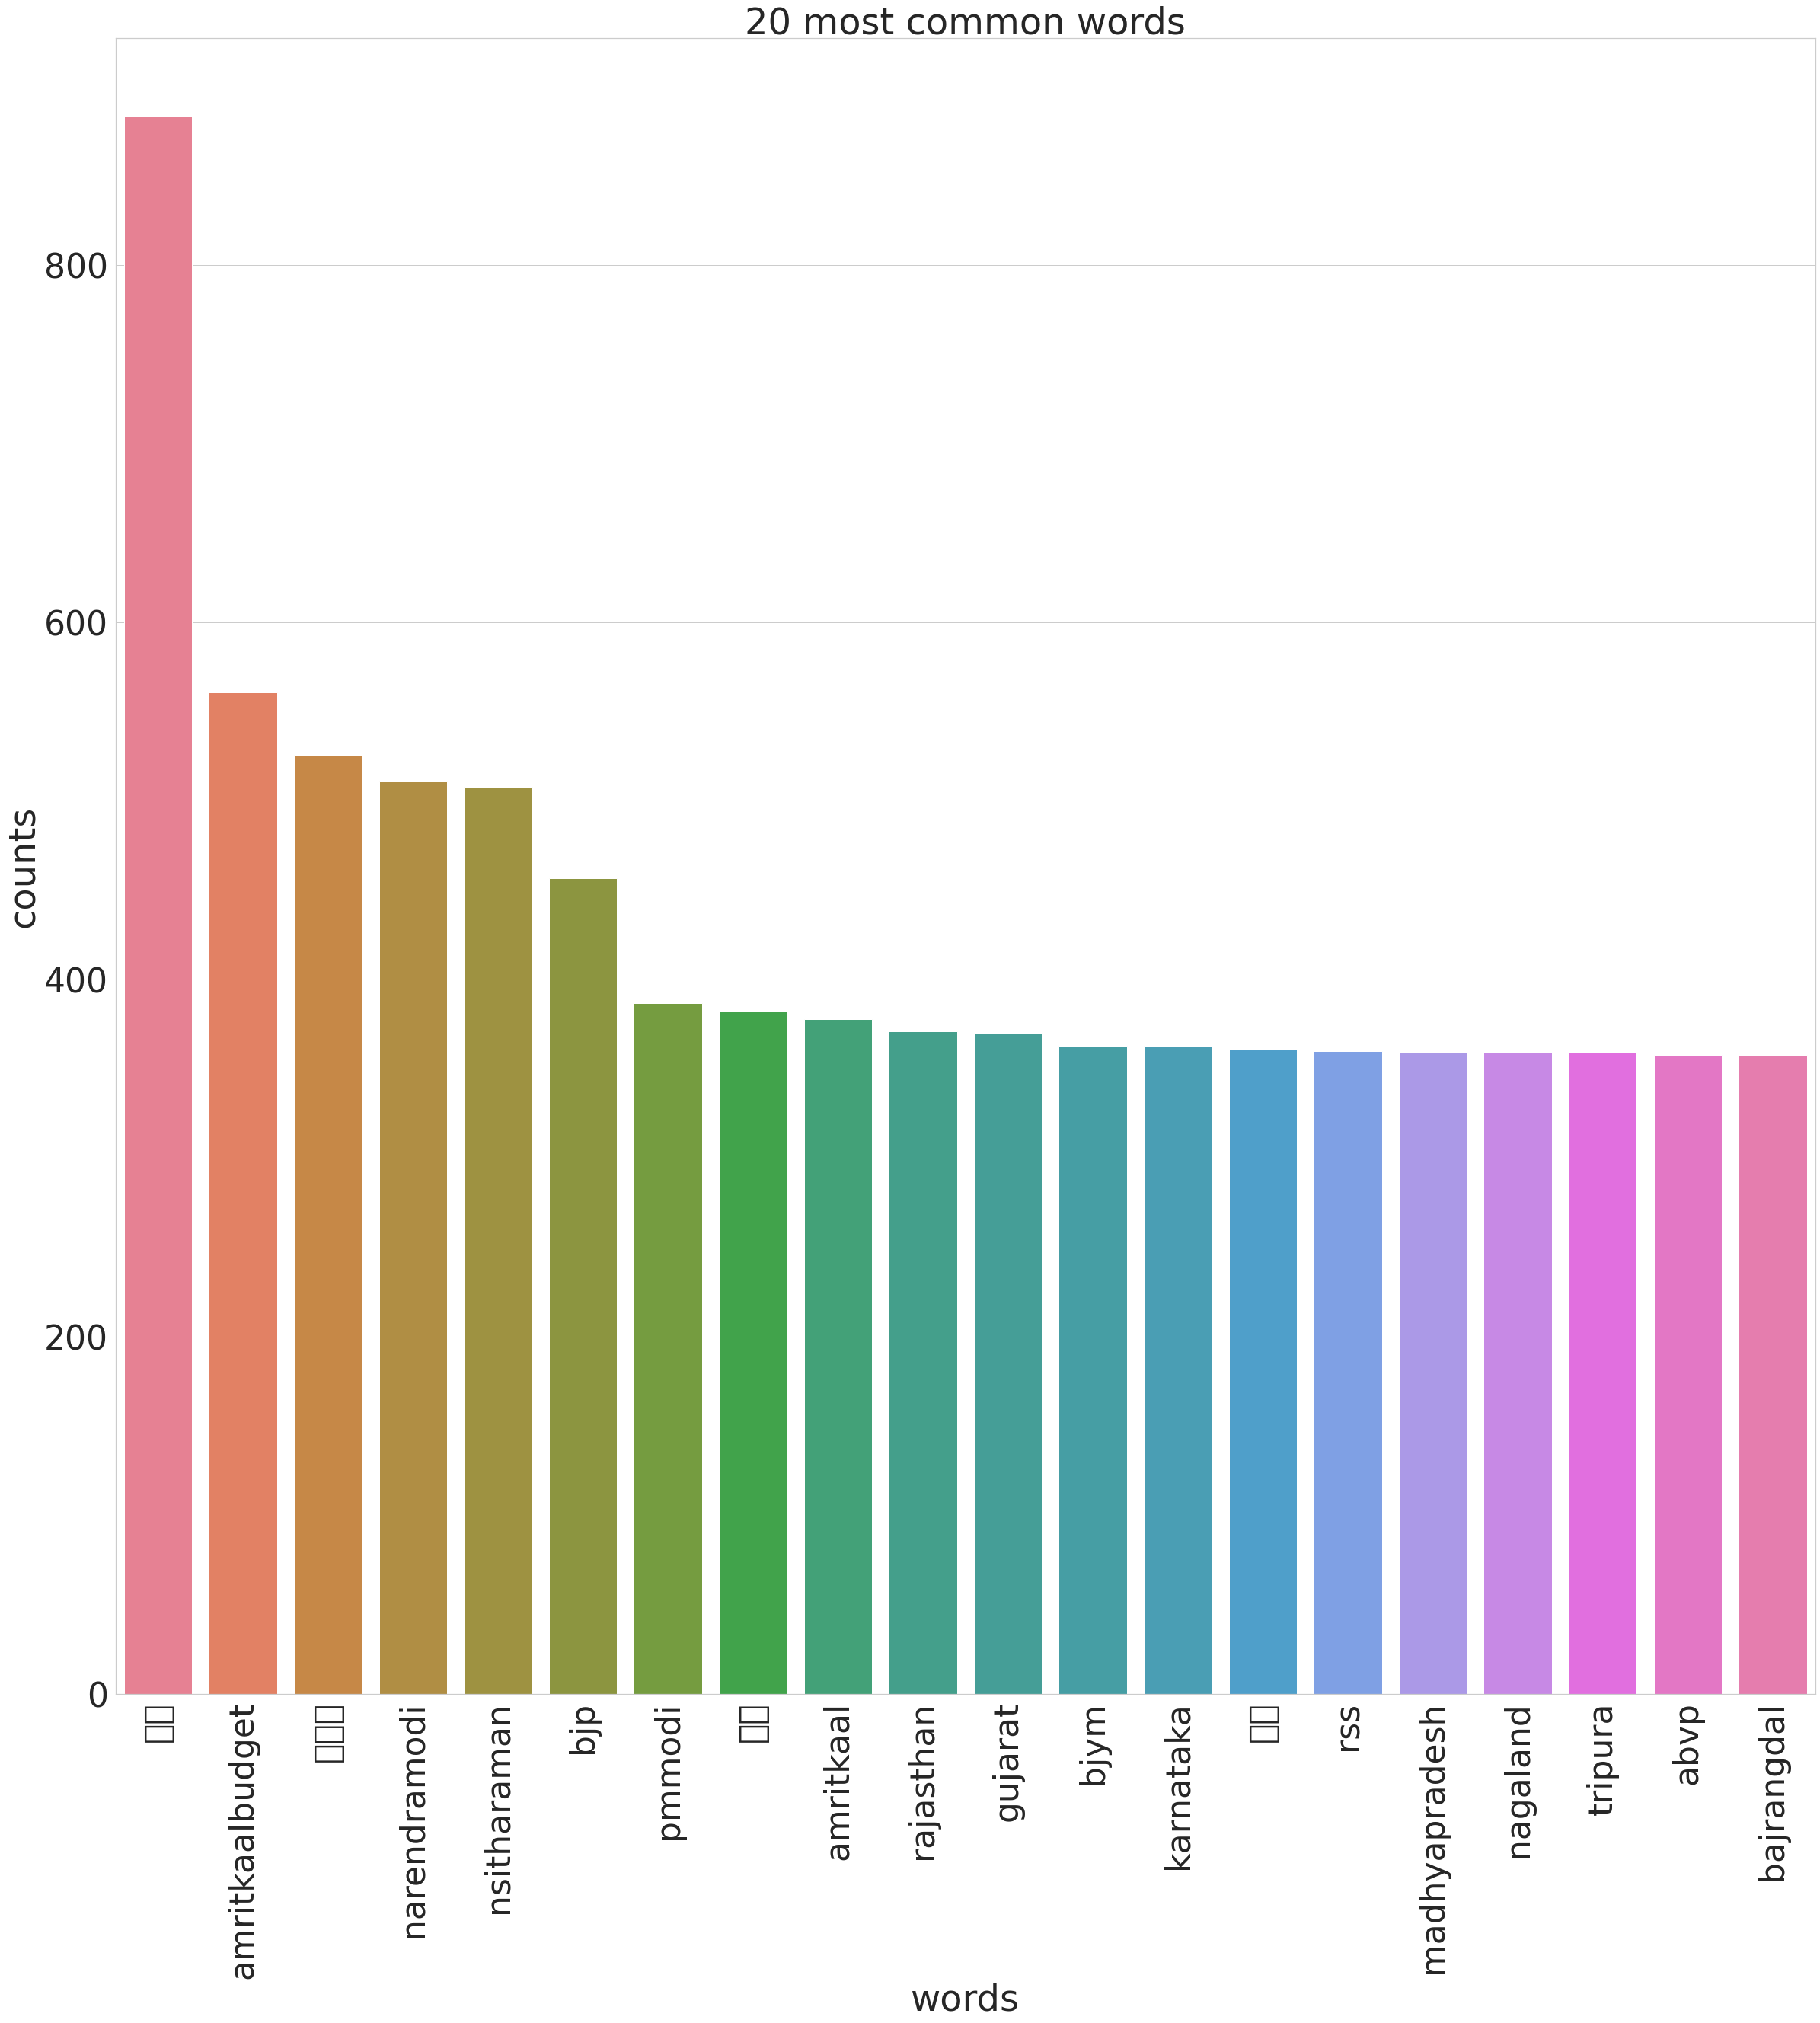

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.set_style('whitegrid')
%matplotlib inline
stop=stop +['budget2023','budget','httpst','2023','modi','nsitaraman','union','24','pmindia','tax','india']
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(40, 40))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=4, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
 # Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stop)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df1['renderedContent'])
# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)
plt.savefig('saved_figure.png')

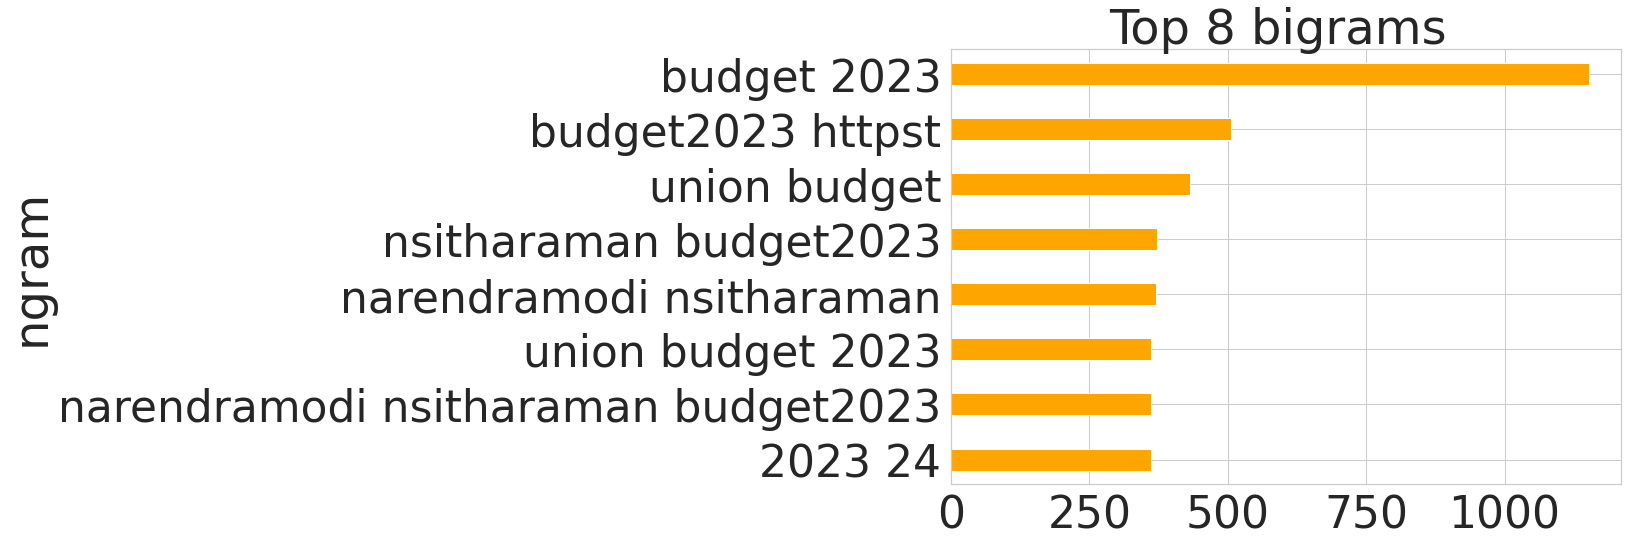

In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 4), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df1['renderedContent'], 8)
mydict={}
for word, freq in common_words:
    bigram_df  = pd.DataFrame(common_words, columns = ['ngram' , 'count'])
bigram_df.groupby('ngram').sum()['count'].sort_values(ascending=False).sort_values().plot.barh(title='Top 8 bigrams ', color='orange', width=.4, figsize=(12, 8), stacked = True)

#iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 10 bigrams ')

## **4. Sentiment Analysis**

In [ ]:
!pip install textblob


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob

In [ ]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df1['subjectivity'] = df1['renderedContent'].apply(get_subjectivity)
df1['polarity'] = df1['renderedContent'].apply(get_polarity)
df1.head()

,date,rawContent,renderedContent,user,replyCount,retweetCount,likeCount,lang,place,hashtags,viewCount,subjectivity,polarity
0,2023-02-02 23:59:47+00:00,Senate Threatens MDAs With Zero Budget Allocat...,Senate Threatens MDAs With Zero Budget Allocat...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,None,[boldthemes],1.0,0.000000,0.000000
1,2023-02-02 23:59:39+00:00,A raft of concessions amid consolidation: On #...,A raft of concessions amid consolidation On #I...,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,3,2,en,None,[India],1217.0,0.683333,0.250000
2,2023-02-02 23:59:37+00:00,"Common man, middle class citizens all are happ...","Common man, middle class citizens all are happ...","{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,en,"{'_type': 'snscrape.modules.twitter.Place', 'i...",None,4.0,0.500000,0.166667
3,2023-02-02 23:58:24+00:00,"Our 2023 budget is in the books.\n\nParks, pla...","Our 2023 budget is in the books.\n\nParks, pla...","{'_type': 'snscrape.modules.twitter.User', 'us...",1,1,9,en,None,None,1215.0,0.600000,0.280000
4,2023-02-02 23:56:48+00:00,#Budget2023,#Budget2023,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,qht,None,[Budget2023],28.0,0.000000,0.000000


In [ ]:
# Obtain polarity scores generated by TextBlob
df1['textblob_score'] = df1['renderedContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
neutral_threshold = 0.05


In [ ]:
# Convert polarity score into sentiment categories
df1['textblob_sentiment'] = df1['textblob_score'].apply(lambda c: 'Positive' if c >= neutral_threshold else ('Negative' if c <= -(neutral_threshold) else 'Neutral'))


In [ ]:
textblob_df = df1[['renderedContent', 'textblob_sentiment', 'likeCount']]
textblob_df

,renderedContent,textblob_sentiment,likeCount
0,Senate Threatens MDAs With Zero Budget Allocat...,Neutral,0
1,A raft of concessions amid consolidation On #I...,Positive,2
2,"Common man, middle class citizens all are happ...",Positive,0
3,"Our 2023 budget is in the books.\n\nParks, pla...",Positive,9
4,#Budget2023,Neutral,0
...,...,...,...
4865,Thanks for posting Ajinkya Kulkarni\n\n#OldTax...,Positive,0
4866,The Railways has been alloted ₹2.41 lakh crore...,Positive,0
4867,Budget 2023 has been welcomed and well receive...,Neutral,22
4868,@sadhanasinghj In my view No change in the old...,Positive,1


In [ ]:
textblob_df['textblob_sentiment'].value_counts()

Neutral     3269
Positive    1304
Negative     297
Name: textblob_sentiment, dtype: int64

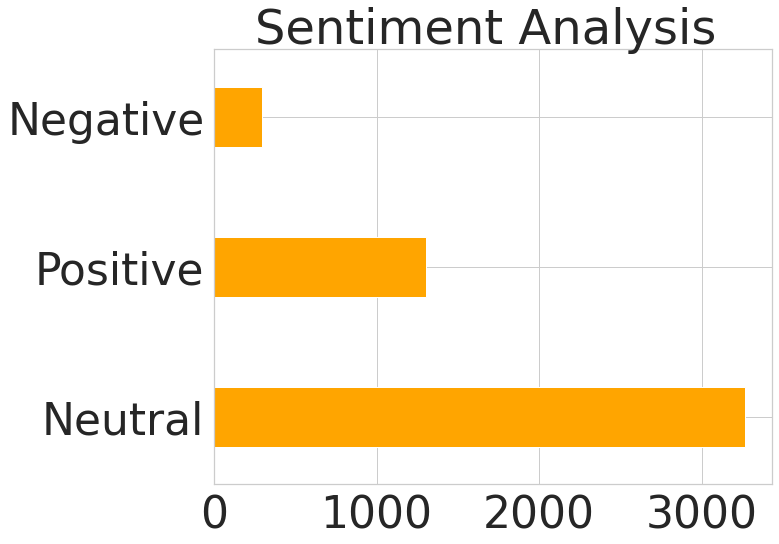

In [ ]:
textblob_df['textblob_sentiment'].value_counts().plot.barh(title='Sentiment Analysis ', color='orange', width=.4, figsize=(10, 8), stacked = True)

**Create Word Cloud**

In [ ]:
df_positive=textblob_df[textblob_df['textblob_sentiment']=='Positive']

In [ ]:
df_Very_positive=df_positive[df_positive['likeCount']>0]

In [ ]:
df_Very_positive.head()

,renderedContent,textblob_sentiment,likeCount
1,A raft of concessions amid consolidation On #I...,Positive,2
3,"Our 2023 budget is in the books.\n\nParks, pla...",Positive,9
17,Cities across compound is defined in part link...,Positive,1
19,Praised and appreciated all over the nation as...,Positive,1
20,My property manager sent me the invoice for wh...,Positive,1


In [ ]:
df_negative=textblob_df[textblob_df['textblob_sentiment']=='Negative']

In [ ]:
df_negative.head()

,renderedContent,textblob_sentiment,likeCount
11,"I fall off on my cooking bad, sigh I need to a...",Negative,0
39,I asked my friend which regional language this...,Negative,9
41,Budget 2023 Higher crude exploration drives no...,Negative,0
42,Budget 2023 Consistency in tax provision and n...,Negative,0
49,"Event Update today, Feb. 2, for CVRD Budget 20...",Negative,0


In [ ]:
df_neutral=textblob_df[textblob_df['textblob_sentiment']=='Neutral']

In [ ]:
df_neutral.head()

,renderedContent,textblob_sentiment,likeCount
0,Senate Threatens MDAs With Zero Budget Allocat...,Neutral,0
4,#Budget2023,Neutral,0
5,"अपना दिल बड़ा रखो ,\nये दुनिया बहुत छोटी है .....",Neutral,0
6,Proposed amendments in the GST Law under the U...,Neutral,0
7,Budget 2023 Reactions Finance Minister Brings ...,Neutral,0


In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

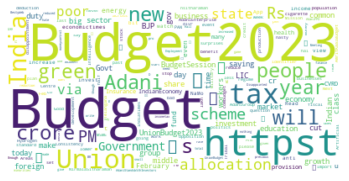

In [ ]:
#Creating the text variable
positive_tw = " ".join(t for t in df_Very_positive.renderedContent)

# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(positive_tw)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

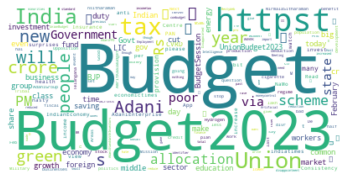

In [ ]:
#Creating the text variable
negative_tw = " ".join(t for t in df_negative.renderedContent)

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(negative_tw)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()